# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [9]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [10]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [21]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [34]:
NY = temp.loc[temp['State'] == 'New York']
NY

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [37]:
print("Average temperature in NY is: ", NY.Temperature.mean().round(1))

Average temperature in NY is:  10.7


#### We want to know cities and states with Temperature above 15 degress Celcius

In [55]:
a = temp.loc[temp['Temperature'] > 15]
cities = list(a.City)
states = list(a.State)
b = zip(cities,states)
print(list(b))

[('NYC', 'New York'), ('Hartford', 'Connecticut'), ('Treton', 'New Jersey'), ('Newark', 'New Jersey')]


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [74]:
list(temp.loc[temp.Temperature > 15].City)

['NYC', 'Hartford', 'Treton', 'Newark']

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [78]:
list(temp.loc[temp.Temperature > 15].loc[temp.Temperature < 20].City)

['NYC', 'Hartford']

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [103]:
print(temp.groupby(['State']).mean())
print(temp.groupby(['State']).std())

             Temperature
State                   
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
             Temperature
State                   
Connecticut     1.964186
New Jersey      1.571348
New York        8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [104]:
employee = pd.read_csv("employee.csv")

#### Explore the data types of the Temp dataframe. Comment your results

In [117]:
employee.dtypes
# We have not numeric columns but Years and Salary 

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

Text(0.5, 1.0, 'Employee Salary')

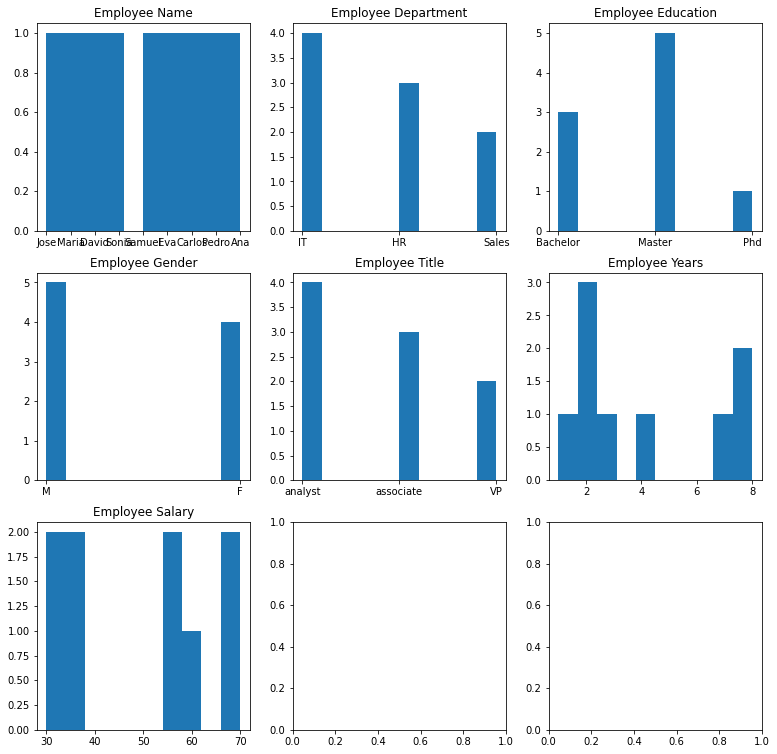

In [140]:
fig, ax = plt.subplots(nrows = 3,
                       ncols = 3, 
                       figsize = (13,13));

# As we have expected, there is not relevant info related to the name
ax[0,0].hist(x = employee.Name)
ax[0,0].set_title("Employee Name")

# People are from 3 different departments: IT, HR and Sales.
# More or less in equal distribution (more in IT, followed by HR and Sales at the tail)
ax[0,1].hist(x = employee.Department)
ax[0,1].set_title("Employee Department")

# Most people have studied a master, and is not commun to own a Pdh
ax[0,2].hist(x = employee.Education);
ax[0,2].set_title("Employee Education")

# We have almost same number of men-women
ax[1,0].hist(x = employee.Gender);
ax[1,0].set_title("Employee Gender")

# We can find mostly analyst, followed by associates and there are less VP
ax[1,1].hist(x = employee.Title);
ax[1,1].set_title("Employee Title")

# The team have had a regular increment of personnel, excluding 7 years ago, and a peak two years ago
ax[1,2].hist(x = employee.Years);
ax[1,2].set_title("Employee Years")

# Salaries are polarized in the groups: one with higher volume between 30-38
# second group between 55-65K, and a restringed group on 70K
ax[2,0].hist(x = employee.Salary);
ax[2,0].set_title("Employee Salary")


#### What's the average salary in this company?

In [147]:
print('The average salary in this company is ', employee.Salary.mean().round(1), 'thousand per year')

The average salary in this company is  48.9 thousand per year


#### What's the highest salary?

In [148]:
employee.Salary.max()

70

#### What's the lowest salary?

In [151]:
low = employee.Salary.min()
low

30

#### Who are the employees with the lowest salary?

In [161]:
names = list(employee.loc[employee.Salary == employee.Salary.min()].Name)
print('People with lower salary are:', names[0], 'and', names[1])

People with lower salary are: Maria and David


#### Could you give all the information about an employee called David?

In [165]:
employee.loc[employee.Name == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [169]:
print('David\'s salary is', list(employee.loc[employee.Name == 'David'].Salary))

David's salary is [30]


#### Print all the rows where job title is associate

In [173]:
employee.loc[employee.Title == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [174]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [175]:
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [176]:
employee.loc[employee.Title == 'associate'].loc[employee.Salary > 55]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [194]:
employee.groupby([employee.Years]).Salary.mean()

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [197]:
employee.groupby(['Title']).Salary.mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

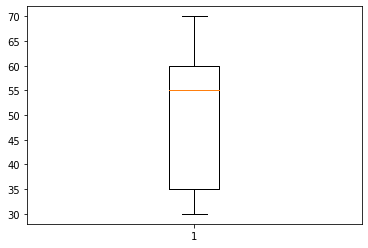

In [210]:
plt.boxplot(employee.Salary);

In [212]:
employee.Salary.quantile([0.25])

0.25    35.0
Name: Salary, dtype: float64

In [213]:
employee.Salary.quantile([0.75])

0.75    60.0
Name: Salary, dtype: float64

#### Is the mean salary per gender different?

In [215]:
# Salary is a little bit higher for Men than for Women
employee.groupby(['Gender']).Salary.mean()

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [219]:
employee.groupby("Department").Salary.describe()

,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
HR,3.0,45.00,21.794495,30.0,32.50,35.0,52.5,70.0
IT,4.0,48.75,19.311050,30.0,33.75,47.5,62.5,70.0
Sales,2.0,55.00,0.000000,55.0,55.00,55.0,55.0,55.0


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [221]:
orders = pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
orders

In [ ]:
# your answer here

####  What is the average Purchase Price?

In [ ]:
# your answer here

#### What were the highest and lowest purchase prices? 

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Select all the customers we have in Spain

In [ ]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here